In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
data = pd.read_csv("sample.csv")

In [3]:
data.head()
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function seaborn.utils.despine>

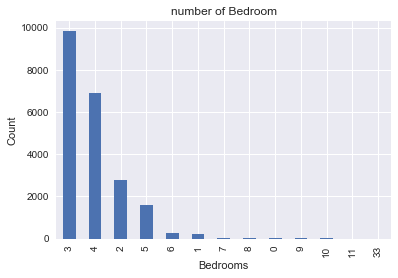

In [4]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

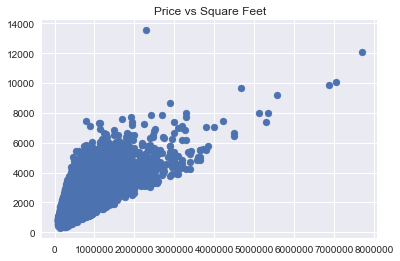

In [5]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

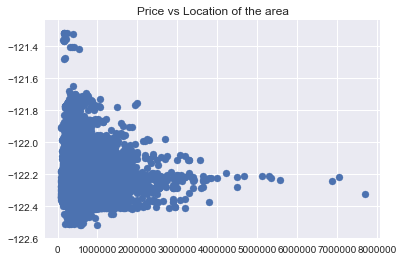

In [6]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

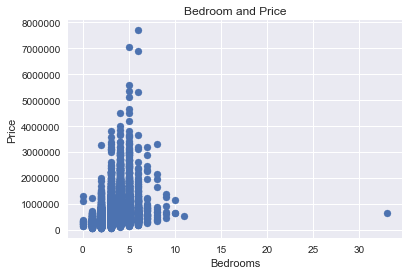

<function seaborn.utils.despine>

In [7]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

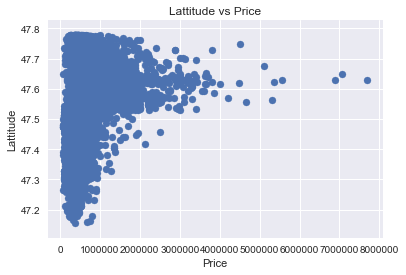

In [8]:
plt.scatter(data.price,data.lat)
plt.title("Lattitude vs Price")
plt.xlabel("Price")
plt.ylabel("Lattitude")
plt.show()

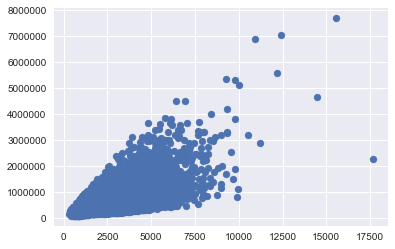

In [9]:
plt.scatter(data["sqft_living"]+data["sqft_basement"],data["price"])

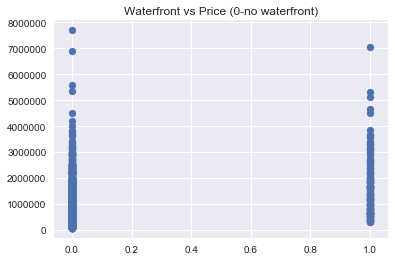

In [10]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price (0-no waterfront)")

In [11]:
conv_dates = []
for x in data["date"]:
    if '2014' in x:
        conv_dates.append(1)
    else:
        conv_dates.append(0)
#print(conv_dates)    
data["date"] = conv_dates
#print(data)

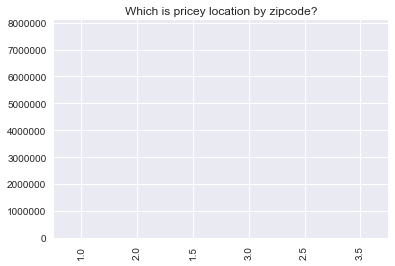

In [12]:
train1 = data.drop(['id','price'],axis=1)
train1.head()
data.floors.value_counts().plot(kind='bar')
plt.scatter(data.zipcode,data.price)
plt.title("Which is pricey location by zipcode?")
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()
labels = data['price']

In [14]:
from sklearn.cross_validation import train_test_split

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
x_train,x_test,y_train,y_test = train_test_split(train1,labels,test_size=0.10,random_state=2)

In [16]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
reg.score(x_test,y_test)

0.73356462313032134